In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split

In [4]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure, show

In [5]:
import seaborn as sns

In [6]:
import graphviz # anaconda prompt- pip install graphviz

In [7]:
import pydotplus # anaconda prompt- pip install pydotplus

In [8]:
import io 
from scipy import misc
%matplotlib inline

In [112]:
file = '../../input/drug_data.csv'
data = pd.read_csv(file,'rb', delimiter =';')

In [113]:
#data.info()

In [114]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df = pd.DataFrame(data)
cols = df.columns[1:13]
for col in cols:
    le.fit(data[col])
    data[col] = le.transform(data[col])

In [115]:
cols = df.columns[13:]
for col in cols:
    data[col] = data[col].str.replace('CL','').astype(int)    

In [116]:
train,test = train_test_split(data, test_size = 0.15)

In [14]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,2,1,0,6,5,27,3,4,6,...,0,0,0,0,0,0,0,2,0,0
1,2,0,0,8,6,1,6,35,29,28,...,4,0,2,0,2,3,0,4,0,0
2,3,2,0,0,6,1,4,28,6,11,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,7,6,1,1,5,0,27,...,0,0,2,0,0,0,0,2,0,0
4,5,2,1,8,6,1,31,11,3,2,...,1,0,0,1,0,0,2,2,0,0
5,6,5,1,2,5,1,6,1,11,35,...,0,0,0,0,0,0,0,6,0,0
6,7,3,0,7,3,1,4,7,3,2,...,0,0,0,0,0,0,0,6,0,0
7,8,2,0,4,6,1,11,35,6,2,...,0,0,0,0,0,0,0,0,0,0
8,9,2,1,0,5,1,30,38,7,28,...,0,0,0,0,0,0,0,6,0,0
9,10,4,0,7,6,1,2,23,10,27,...,0,0,0,0,0,0,0,6,0,0


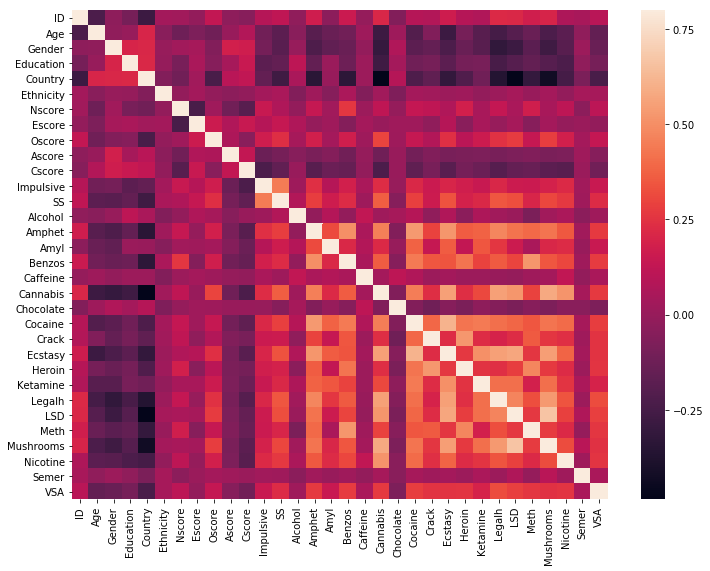

In [15]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=False);

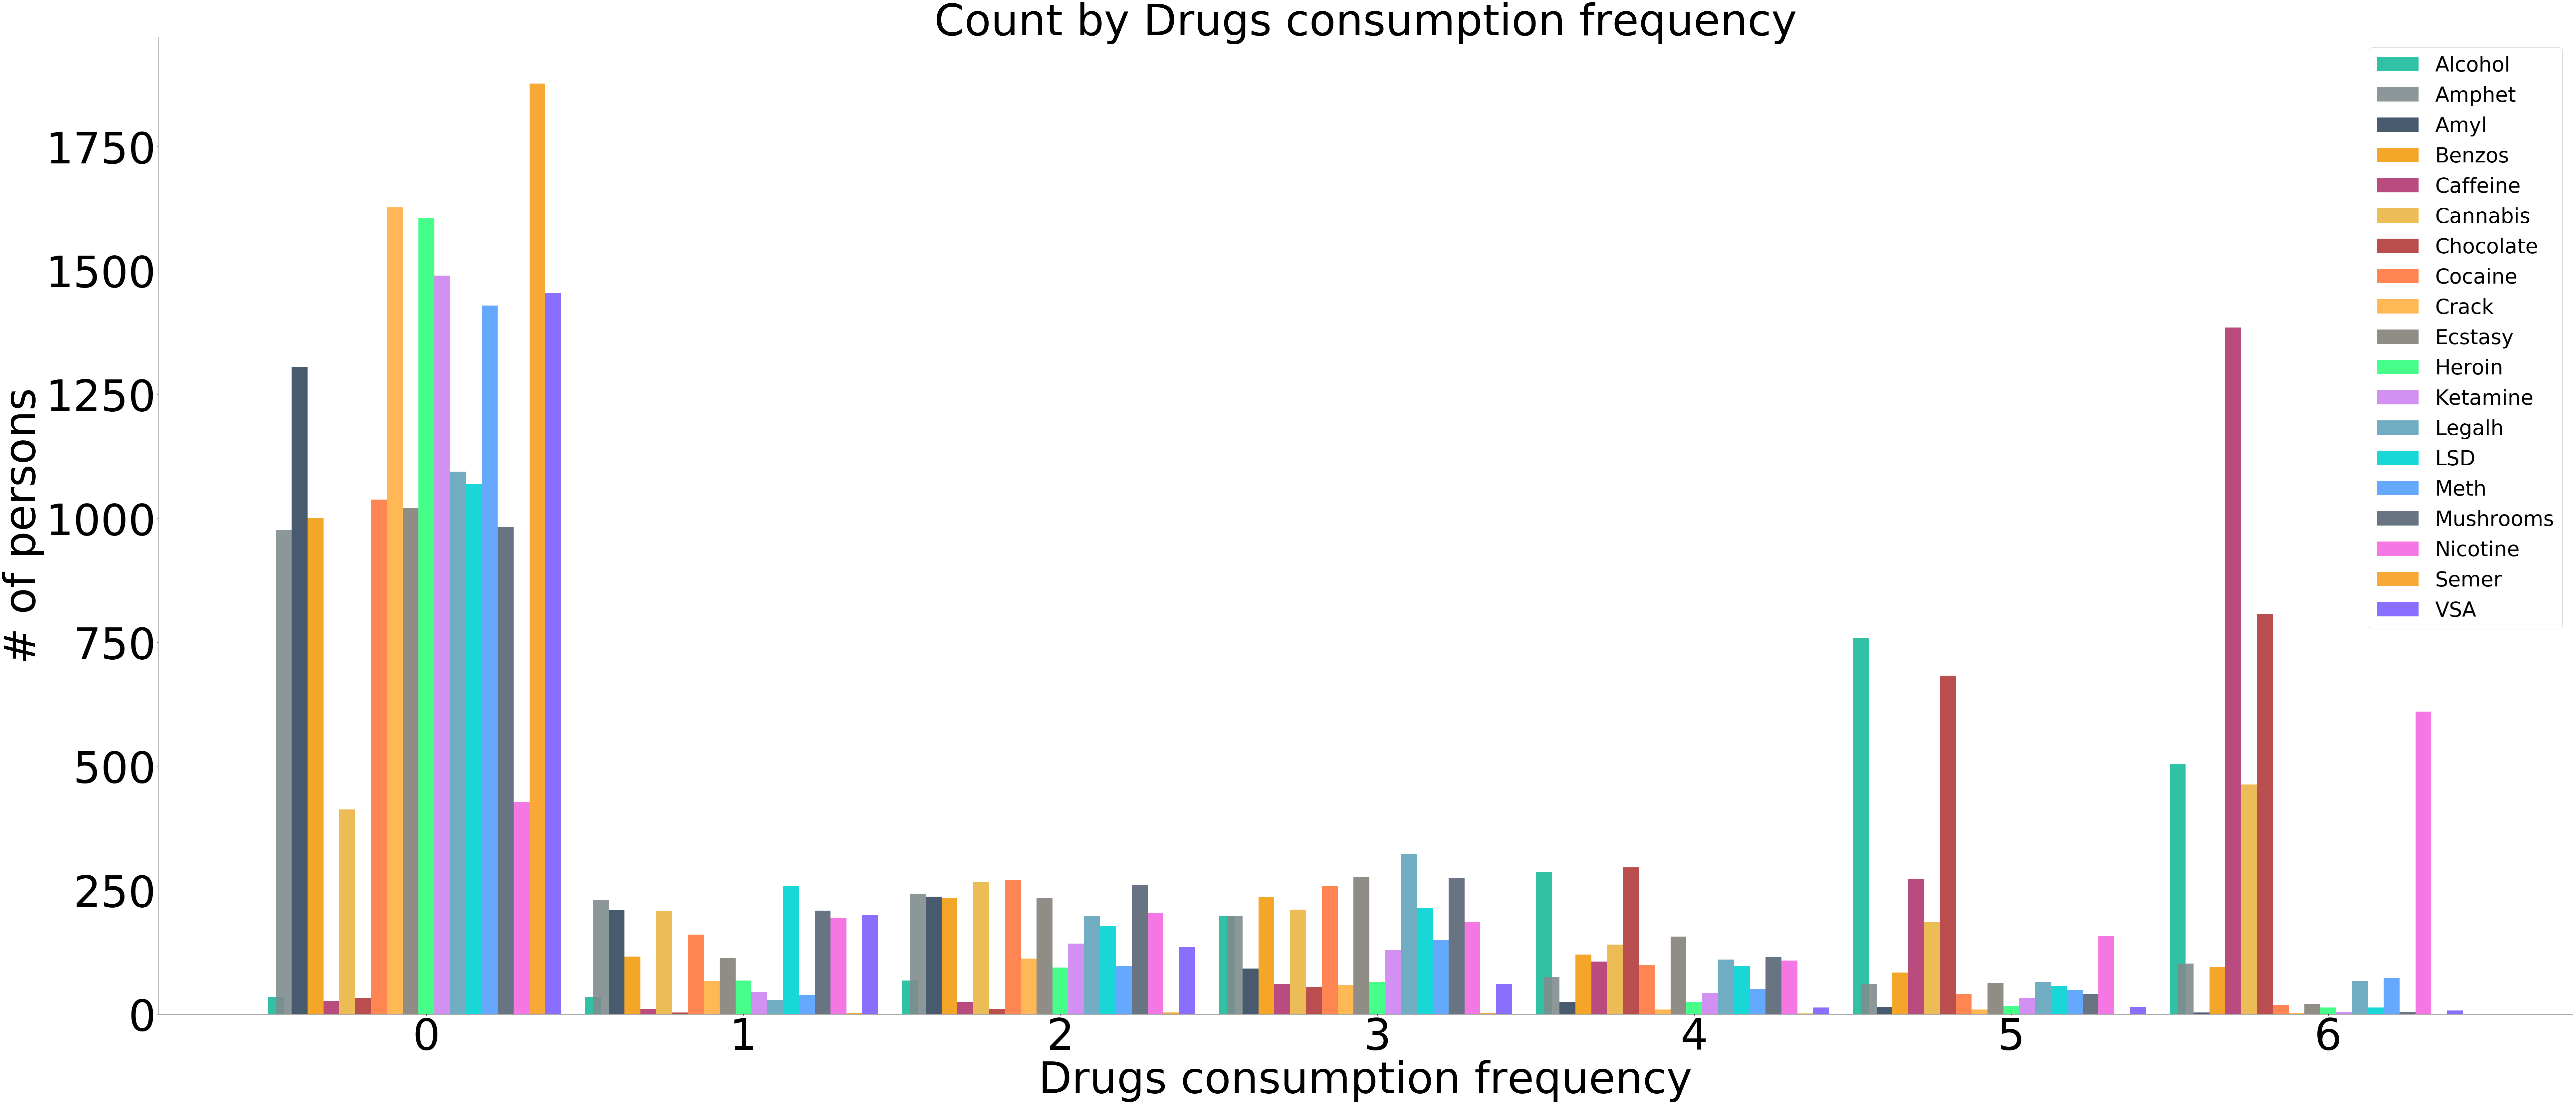

In [16]:
#fig, ax=plt.subplots(1,19, figsize=(100,12))
colors = ['#1abc9c','#7f8c8d','#34495e','#f39c12','#B33771','#EAB543',
         '#b33939','#ff793f','#ffb142','#84817a','#32ff7e','#cd84f1',
         '#60a3bc','#00d2d3','#54a0ff','#576574','#f368e0','#F79F1F', '#7d5fff']
h = 0
mylist = []
collist = []

for w in cols:
    arrr = [0,0,0,0,0,0,0]
    collist.append(w)
    arrr[0] = len(data[data[w] == 0][w])
    arrr[1] = len(data[data[w] == 1][w])
    arrr[2] = len(data[data[w] == 2][w])
    arrr[3] = len(data[data[w] == 3][w])
    arrr[4] = len(data[data[w] == 4][w])
    arrr[5] = len(data[data[w] == 5][w])
    arrr[6] = len(data[data[w] == 6][w])
    mylist.append(arrr)
    
# data to plot
n_groups = 7

# create plot
fig, ax = plt.subplots(figsize=(130,54))
index = np.arange(n_groups)
bar_width = 0.05
opacity = 0.9

rects1 = plt.bar(index, mylist[0], bar_width,
                 alpha=opacity,
                 color=colors[0],
                 label=cols[0], align='edge')

z = index
for k in range(1,19):
    z = z + bar_width
    rects2 = plt.bar(z, mylist[k], bar_width, alpha=opacity, color=colors[k],label=cols[k])


plt.xlabel('Drugs consumption frequency',fontsize="130")
plt.ylabel('# of persons',fontsize="130")
plt.yticks(fontsize="130")
plt.title('Count by Drugs consumption frequency',fontsize="130")
plt.xticks(index + 10*bar_width, ('0', '1', '2', '3', '4', '5', '6'), fontsize="130")
plt.legend(prop={'size':62})
 
#plt.tight_layout()
plt.show()



In [17]:
#plt.figure(figsize=(12,6))
#sns.countplot(data=data,x=[0,1,2,3,4,5,6], hue=data["Alcohol"])
#ax.set_xticklabels(["0","1","2","3","4","5","6"], grid_color="b")
#plt.show()

#plot data
#fig, ax = plt.subplots(figsize=(15,7))
#data.groupby(df.columns[13:]).count().plot(ax=ax)

In [80]:
# features = ["danceability","loudness","valence","energy","instrumentalness","acousticness","key","speechiness","duration_ms"]
df = pd.DataFrame(data)

#features = df.columns.difference(['ID', 'Age',])
features = df.columns[1:].difference(['LSD'])
features


Index(['Age', 'Alcohol', 'Amphet', 'Amyl', 'Ascore', 'Benzos', 'Caffeine',
       'Cannabis', 'Chocolate', 'Cocaine', 'Country', 'Crack', 'Cscore',
       'Ecstasy', 'Education', 'Escore', 'Ethnicity', 'Gender', 'Heroin',
       'Impulsive', 'Ketamine', 'Legalh', 'Meth', 'Mushrooms', 'Nicotine',
       'Nscore', 'Oscore', 'SS', 'Semer', 'VSA'],
      dtype='object')

In [117]:
df = pd.DataFrame(data)
features = df.columns[1:13].difference(['LSD'])
# with mushroom
features = features.append(df.columns[28:29])
features


Index(['Age', 'Ascore', 'Country', 'Cscore', 'Education', 'Escore',
       'Ethnicity', 'Gender', 'Impulsive', 'Nscore', 'Oscore', 'SS',
       'Mushrooms'],
      dtype='object')

In [118]:
model = DecisionTreeClassifier(min_samples_split=100,criterion="gini")
x_train = train[features]
y_train = train["LSD"]
x_test = train[features]
y_test = train["LSD"]

dt = model.fit(x_train,y_train)

In [119]:
def show_tree(tree,features,path):
    f=io.StringIO()
    export_graphviz(tree,out_file=f,feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"] = (120,120)
    plt.imshow(img)

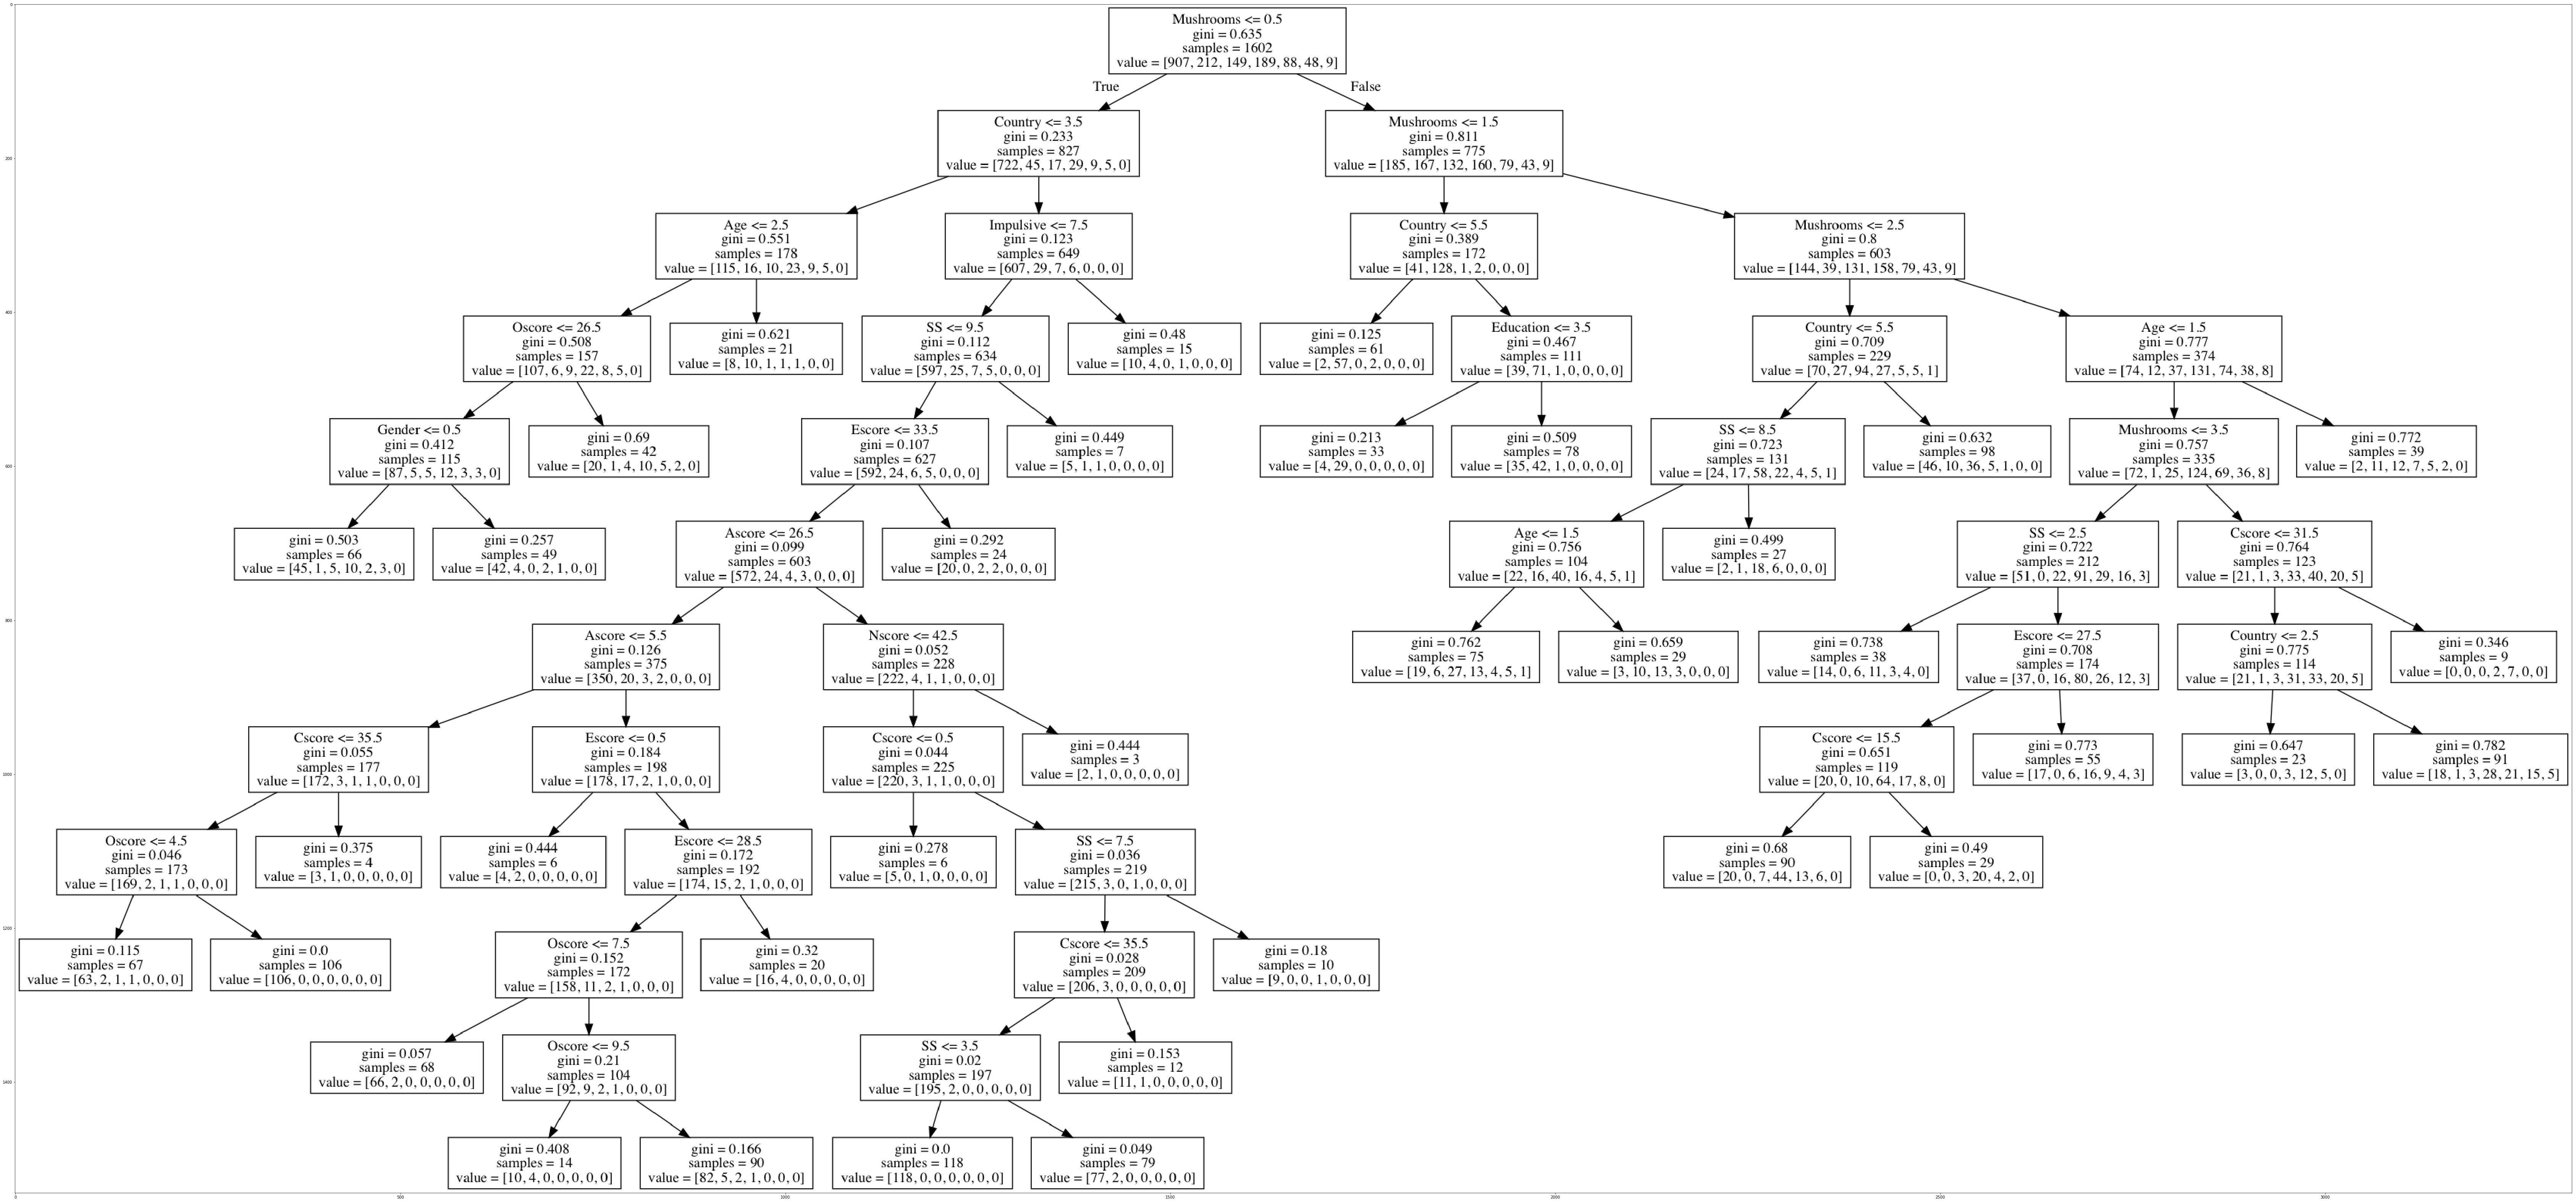

In [120]:
show_tree(dt,features,'dec_tree_01.png')

In [121]:
y_predict = model.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.69288389513108617